Done by Wong Wen Bing, 230436M

# **Part 1: Data Preparation and Understanding** 

In [1]:
pip install pandas seaborn nltk matplotlib

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
     ---------------------------------------- 0.0/61.0 kB ? eta -:--:--
     ------------ ------------------------- 20.5/61.0 kB 330.3 kB/s eta 0:00:01
     ------------------------------- ------ 51.2/61.0 kB 525.1 kB/s eta 0:00:01
     -------------------------------------- 61.0/61.0 kB 540.4 kB/s eta 0:00:00
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ------------------- -------------------- 143.4/294.9 kB 4.3 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 6.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/15.8 MB ? eta -:--:--
    --------------------------------------- 0.2/15.8 MB 4.8 MB/s eta 0:00:04
   -- ------------------------------------- 1.1/15.8 MB 11.5 MB/s eta 0:00:02
   ---- ----------------------------------- 1.6/15.8 MB 12.8 MB/s eta 0:00:02
   ----- ---------------------------------- 2.3/15.8 MB 12.3 MB/s eta 0:00:02
   ------- 

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
blis 1.0.1 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
thinc 8.3.2 requires numpy<2.1.0,>=2.0.0; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [82]:
# Import Data 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
import re
from nltk.corpus import stopwords

In [83]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\wongw\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\wongw\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\wongw\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\wongw\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\wongw\AppData\Roaming\nltk_data...
[

True

In [84]:
data=pd.read_excel('Data.xlsx')
data

,description,species
0,2 Jun 2023 ï¿½ The Javan myna shares some simi...,Javan Myna
1,Click here for more information about the Red ...,Collared Kingfisher
2,The black-headed oriole ( Oriolus larvatus) is...,Black-naped Oriole
3,"Search from thousands of royalty-free ""Javan M...",Javan Myna
4,521 foreground recordings and 156 background ...,Little Egret
...,...,...
737,"August 13, 2016 - HISTORICAL records show that...",Little Egret
738,File: Black-naped Oriole (Oriolus chinensis ch...,Black-naped Oriole
739,Larger than a Cattle Egret and with black leg...,Little Egret
740,22 Oct 2023 ï¿½ Dragon Snake (Javan Tubercle S...,Javan Myna


In [85]:
data.isna().sum()

description    24
species         0
dtype: int64

In [86]:
dup=data.duplicated().value_counts()
print(f'''
true: {dup[True]}
false: {dup[False]}
''')


true: 128
false: 614



In [87]:
#drop null and duplicate values
data=data.dropna()
data=data.drop_duplicates()
data.info()
data=data.reset_index()
data

<class 'pandas.core.frame.DataFrame'>
Index: 611 entries, 0 to 739
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   description  611 non-null    object
 1   species      611 non-null    object
dtypes: object(2)
memory usage: 14.3+ KB


,index,description,species
0,0,2 Jun 2023 ï¿½ The Javan myna shares some simi...,Javan Myna
1,1,Click here for more information about the Red ...,Collared Kingfisher
2,2,The black-headed oriole ( Oriolus larvatus) is...,Black-naped Oriole
3,3,"Search from thousands of royalty-free ""Javan M...",Javan Myna
4,4,521 foreground recordings and 156 background ...,Little Egret
...,...,...,...
606,735,Black-naped Oriole (Oriolus chinensis). The bl...,Black-naped Oriole
607,736,"Feb 15, 2023 Â· Sacred kingfisher. Todiramphu...",Collared Kingfisher
608,737,"August 13, 2016 - HISTORICAL records show that...",Little Egret
609,738,File: Black-naped Oriole (Oriolus chinensis ch...,Black-naped Oriole


In [88]:
data.groupby(['species']).count()

,index,description
species,,
Black-naped Oriole,193,193
Collared Kingfisher,142,142
Javan Myna,157,157
Little Egret,119,119


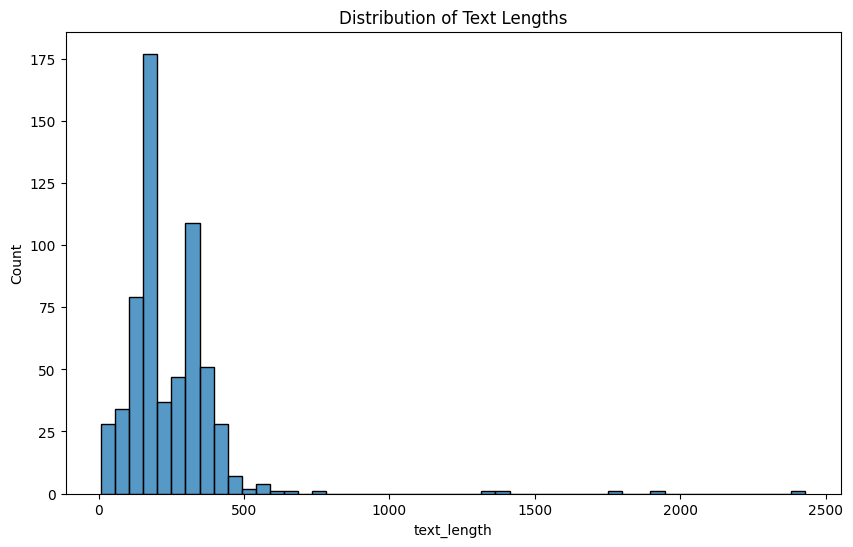

In [89]:
data['text_length'] = data['description'].apply(len)
plt.figure(figsize=(10,6))
sns.histplot(data['text_length'], bins=50)
plt.title('Distribution of Text Lengths')
plt.show()

In [99]:
def preprocess_text(text):
    stopwordss=list(stopwords.words('english'))
    wordss=[]
    text = text.lower()  # Convert to lowercase
    # text = re.sub(r'\w*\d\w*', '', text)  # Remove words with numbers
    # text = re.sub(r'\W+', ' ', text)  # Remove special characters
    text = re.sub(r'[^a-z0-9\s]', '', text)
    tokens = word_tokenize(text)
    # print(tokens)
    for word in tokens: 
        if word not in stopwordss: 
            wordss.append(word)
    # tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
    # print(tokens)
    # wordss.append(tokens)
    # print(wordss)
    return wordss
data['cleaned_text']=''
data.head()

,index,description,species,text_length,cleaned_text
0,0,2 Jun 2023 ï¿½ The Javan myna shares some simi...,Javan Myna,162,
1,1,Click here for more information about the Red ...,Collared Kingfisher,398,
2,2,The black-headed oriole ( Oriolus larvatus) is...,Black-naped Oriole,349,
3,3,"Search from thousands of royalty-free ""Javan M...",Javan Myna,177,
4,4,521 foreground recordings and 156 background ...,Little Egret,112,


In [100]:
# Apply preprocessing
data['cleaned_text'] = data['description'].apply(preprocess_text)
data.head()

,index,description,species,text_length,cleaned_text
0,0,2 Jun 2023 ï¿½ The Javan myna shares some simi...,Javan Myna,162,"[2, jun, 2023, javan, myna, shares, similariti..."
1,1,Click here for more information about the Red ...,Collared Kingfisher,398,"[click, information, red, list, categories, cr..."
2,2,The black-headed oriole ( Oriolus larvatus) is...,Black-naped Oriole,349,"[blackheaded, oriole, oriolus, larvatus, speci..."
3,3,"Search from thousands of royalty-free ""Javan M...",Javan Myna,177,"[search, thousands, royaltyfree, javan, myna, ..."
4,4,521 foreground recordings and 156 background ...,Little Egret,112,"[521, foreground, recordings, 156, background,..."


In [69]:
from nltk.probability import FreqDist

In [104]:
df['freq']= ''
freq=nltk.FreqDist(data["cleaned_text"] for i in data.index)
freq

TypeError: unhashable type: 'Series'